In [1]:
!pip3 install urllib3
!pip install numpy scipy matplotlib pandas cvxopt
# !wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
# !chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
# !bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
#!pip install conda
# !conda update -n base conda
# !conda install -y --prefix /usr/local -c python-graphviz python=3.6
# !conda install python-graphviz

In [0]:
import urllib3
import numpy as np
from scipy.stats import mode
from math import log,ceil,sqrt
from collections import namedtuple, Counter, defaultdict
import pandas as pd
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier
# import graphviz
import seaborn as sns
from math import exp,log10
from sklearn.neural_network import MLPClassifier

import cvxopt
from cvxopt import solvers,matrix

import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import precision_recall_fscore_support

In [0]:
def plot_confusion_matrix(Y_actual,Y_predicted):
    conf_matrix =  metrics.confusion_matrix(Y_actual,Y_predicted)
    sns.heatmap(conf_matrix, annot=True,  fmt='', cmap="Blues")

In [0]:
def plot_stats_bargraph(Y, Y_Predicted_SkSvm):
  acc = precision_recall_fscore_support(Y, Y_Predicted_SkSvm, average='macro')

  ind = np.arange(1)
  width = 0.2
  # Plotting the bar chart of accuracy, precision, recall & f1

  fig, ax = plt.subplots()

  ax.set_ylabel('Percentage')
  ax.set_xticks(ind + width)
  ax.set_xticklabels('')

  bar1 = ax.bar(ind, acc[0], width, color='r')
  bar2 = ax.bar(ind + width, acc[1], width, color='g')
  bar3 = ax.bar(ind + width * 2, acc[2], width, color='b')

  ax.legend((bar1[0], bar2[0], bar3[0]),
            ('Precision', 'Recall', 'F1-score'), loc=2,prop={'size':8})

In [0]:
def normalize(Z):
    mean = np.sum(Z,axis=0)/len(Z)
    max = np.max(Z, axis=0)
    min = np.min(Z, axis=0)
    var = []
    
    for i in range(Z.shape[1]):
        sum1 = 0
        for j in range(Z.shape[0]):
            sum1 += (Z[j,i] - mean[i])**2
        var.append(1. *sum1/len(Z))

    for i in range(Z.shape[1]):
        for j in range(Z.shape[0]):
#             Z[j,i] = (Z[j,i] - mean[i])/sqrt(var[i])      #Standardization
#             Z[j,i] = (Z[j,i] - min[i])/(max[i] - min[i])    #Rescaling (min-max normalization)
            Z[j,i] = (Z[j,i] - mean[i])/(max[i] - min[i])    #Mean normalization
           
    return Z

In [0]:
###function to predict the accuracy on the basis of the predicted value###

def accuracy(Y,Y_predicted):
                
    sum1 = sum([1 for i in range(len(Y)) if Y[i] == Y_predicted[i]])
    return (1.0*sum1/len(Y))*100

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
http = urllib3.PoolManager()

response = http.request('GET', url)

data = response.data.decode("utf-8") 
data = data.split('\n')[:-1]

X = []
Y = []
colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang','oldpeak','slope','ca','thal']
for i in data:
    
    x = i.split(',')
    
    Y.append(float(x[len(x)-1]))
    x = x[0:len(x)-1]
    
    for j in range(len(x)):
        if x[j] == '?':
            x[j] = -1
    
    x = map(float,x)
    
    X.append(list(x))
    
X = np.array(X)

Y = np.reshape(np.array(Y),(len(Y),))
Y[Y > 0] = 1

for i in range(X.shape[1]):
  m = mode(X[:,i])[0][0]
  for j in range(X.shape[0]):
        if X[j][i] == -1:
            X[j][i] = m

X_norm = normalize(X.copy())

#Cleaned and Normalised Data
print(X_norm)
print(Y)

dataFrame = pd.DataFrame(data=X,columns=colnames)
dataFrame.describe()

[[ 0.17835534  0.32013201 -0.71947195 ...  0.69966997 -0.22112211
   0.31930693]
 [ 0.26168867  0.32013201  0.28052805 ...  0.19966997  0.77887789
  -0.43069307]
 [ 0.26168867  0.32013201  0.28052805 ...  0.19966997  0.44554455
   0.56930693]
 ...
 [ 0.05335534  0.32013201  0.28052805 ...  0.19966997  0.11221122
   0.56930693]
 [ 0.05335534 -0.67986799 -0.38613861 ...  0.19966997  0.11221122
  -0.43069307]
 [-0.342478    0.32013201 -0.05280528 ... -0.30033003 -0.22112211
  -0.43069307]]
[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [8]:
# Printing first 5 rows
dataFrame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


**DECISION TREE (ID3 Algorithm)**

[(-17.45382861085981, 4), (-11.237768217040232, 7), (-3.452680190490664, 0), (-2.9230096302465722, 3), (-1.5196099057219676, 9), (0.9425690189977565, 11), (0.9444985082330323, 2), (0.959905887509417, 10), (0.9618248890673375, 12), (0.9690710838490171, 6), (0.9764175561513732, 5), (0.9779081087812802, 1), (0.9786909958382057, 8)]
[(-9.378206805053743, 7), (-7.655052677365614, 4), (-3.038093108769218, 0), (-2.3579963015115304, 3), (-1.4173253847099576, 9), (0.7942581497155747, 11), (0.8019370084732157, 2), (0.8292232763617647, 10), (0.8551179451572237, 6), (0.8565386884841218, 1), (0.8567925592228384, 5), (0.8700468146089122, 8)]
[(-9.378206805053743, 7), (-7.655052677365614, 4), (-3.038093108769218, 0), (-2.3579963015115304, 3), (-1.4173253847099576, 9), (0.8019370084732157, 2), (0.8292232763617647, 10), (0.8551179451572237, 6), (0.8565386884841218, 1), (0.8567925592228384, 5), (0.8700468146089122, 8)]
[(-9.378206805053743, 7), (-7.655052677365614, 4), (-3.038093108769218, 0), (-2.35799

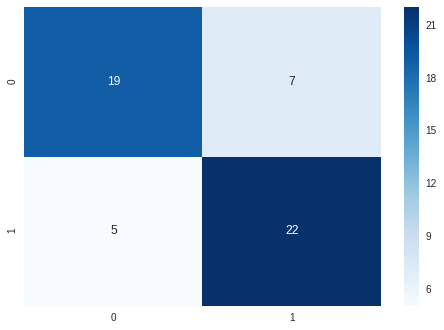

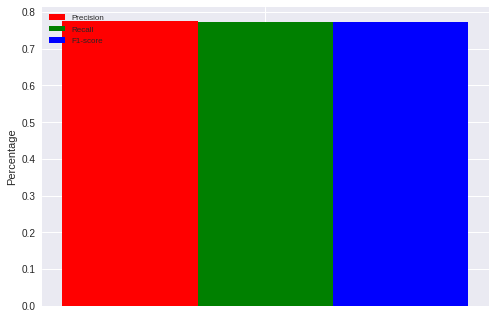

In [9]:

trainingTuple = namedtuple('TrainingData', ('X', 'Y'))

class CreateNode(dict):

    def __init__(self, feature):
        self.feature = feature
        
    def is_leaf(self):
        return False


class CreateLeaf(dict):
  
    def __init__(self, clas):
       
        self.clas = clas

    def is_leaf(self):
        return True
      
      
class Id3(object):
  
    def __init__(self):
        self.root = None
     
    def create_decision_tree(self, data, target):
        #Examples
        training = []
        for i,j in zip(data,target):
            training.append(trainingTuple(i,j))
        
        #Creating decisionTree
        self.root = self.decision_tree(training, attributes = list(data[0]))
    
    def mode(self,rows):
        classes = []
        for i in rows:
            classes.append(i.Y)
        mode_class = Counter(classes).most_common()[0][0]
        return mode_class
    
    def decision_tree(self, data, attributes):
       
        #if no attrbutes are left
        if len(attributes) == 0:
            class_def = self.mode(data)
            root = CreateLeaf(class_def) 
        else:
            labels = []
            for i in data:
                labels.append(i.Y)
            
            #if All labels are same
            if len(set(labels)) == 1:
                target_label = data[0].Y
                root = CreateLeaf(target_label)
                
            else:
                #select attribute with best information gain
                
                split_attribute = self.high_infogain_attribute(data,attributes,labels)
                root = CreateNode(split_attribute)
                best_attr_val = set([i.X[split_attribute] for i in data])
                
                #select the subtree and recurse
                for val in best_attr_val:
                    subtree_training_data = []
                    for i in data:
                        if i.X[split_attribute] == val:
                            subtree_training_data.append(i)
                            
                    #create children nodes.
                    child = self.decision_tree(subtree_training_data,attributes)
                    root[val] = child
        return root
     
    #selecting attribute with highest gain
    def high_infogain_attribute(self, rows, attributes, labels):
        information_gain = []
        for i in range(len(attributes)):
            information_gain.append((self.info_gain_calc(rows, i, labels), i))
        
        info_gain_sorted = sorted(information_gain, key=lambda x: x[0])
        highest_info_gain = info_gain_sorted[-1][1]
        
        attributes.pop(len(attributes)-1)
        print(info_gain_sorted)
        return highest_info_gain

    #calculating the gain
    def info_gain_calc(self, data, attributes, labels):
      
        branches = defaultdict(list)
        entropy_before = self.entropy(labels)
        for i in data:
            branches[i.X[attributes]].append(i)
        after_entropy = 0.0
        for i in branches.values():
            class_branch = []
            for j in i:
                class_branch.append(j.Y)
            after_entropy += (len(branches) / len(data)) * self.entropy(class_branch)
        return entropy_before - after_entropy
    
    #calculating entropy
    def entropy(self,data):
        def log2(x):
            if x == 0:
                return 0
            else:
                return log(x)/log(2)
        counter = Counter(data)
        N = len(data)
        ent = []
        for i in counter:
            ent.append(-1.0*(counter[i] / len(data))*log2(counter[i] / len(data)))
        return sum(ent)
    
    #predicting the label
    def predict(self, X, allow_unclassified=False):
        class_def = 1
        if allow_unclassified:
            class_def = -99
        predicted = []

        for training in X:
            predicted_label = None
            current_node = self.root
            while predicted_label is None:
                if current_node.is_leaf():
                    predicted_label = current_node.clas
                else:
                    
                    key_value = training[current_node.feature]
                    if key_value in current_node:
                        current_node = current_node[key_value]
                    else:
                        predicted_label = class_def
            predicted.append(predicted_label)
        return predicted
      
clf = Id3()
clf.create_decision_tree(X_norm[:250],Y[:250])
Y_predicted = clf.predict(X_norm[250:])


print ("Accuracy of the Decision Tree is: "+ str(accuracy(Y[250:],Y_predicted)))
print ("Precision and Recall for the Decision Tree\n")
print (metrics.classification_report(Y[250:],Y_predicted))
print ("Confusion Matrix\n")
plot_confusion_matrix(Y[250:],Y_predicted)
plot_stats_bargraph(Y[250:], Y_predicted)




**DECISION TREE USING SKLEARN**

Accuracy of the Decision Tree is: 69.81132075471697
Precision and Recall for the Decision Tree

              precision    recall  f1-score   support

         0.0       0.65      0.85      0.73        26
         1.0       0.79      0.56      0.65        27

   micro avg       0.70      0.70      0.70        53
   macro avg       0.72      0.70      0.69        53
weighted avg       0.72      0.70      0.69        53

Confusion Matrix



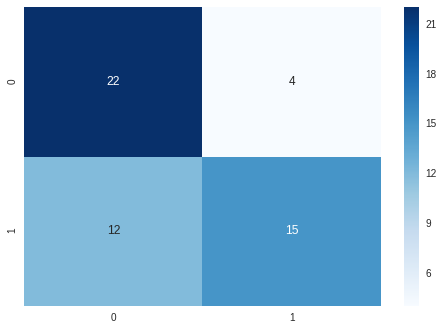

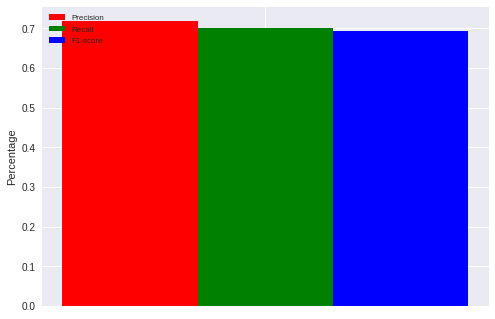

In [10]:
#Decision tree from Sklearn
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X_norm[:250],Y[:250])

# dot_data = tree.export_graphviz(clf2, out_file = None, filled = True, rounded = True, special_characters = True, feature_names = colnames,proportion=True)
# graph = graphviz.Source(dot_data)
# graph
Y_predicted_sk = clf2.predict(X_norm[250:])


print ("Accuracy of the Decision Tree is: "+ str(accuracy(Y[250:],Y_predicted_sk)))
print ("Precision and Recall for the Decision Tree\n")
print (metrics.classification_report(Y[250:],Y_predicted_sk))
print ("Confusion Matrix\n")
plot_confusion_matrix(Y[250:],Y_predicted_sk)
plot_stats_bargraph(Y[250:], Y_predicted_sk)

**RANDOM FOREST CLASSIFIER SKLEARN**

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
Accuracy of the Random Forest is: 73.58490566037736
Precision and Recall for the Random Forest

              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77        26
         1.0       0.84      0.59      0.70        27

   micro avg       0.74      0.74      0.74        53
   macro avg       0.76      0.74      0.73        53
weighted avg       0.76      0.74      0.73        53

Confusion Matrix



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


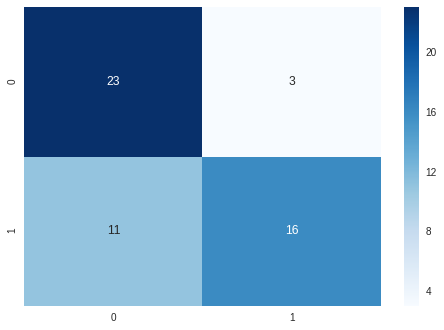

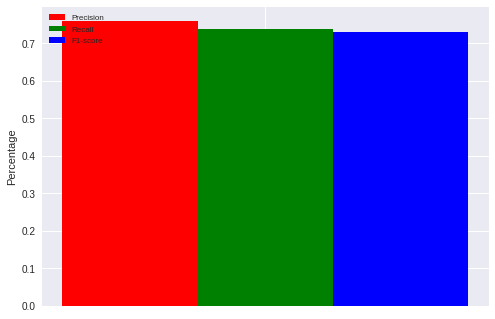

In [11]:
clf3 = RandomForestClassifier(max_features=13, random_state=1)
print(clf3)
clf3 = clf3.fit(X_norm[:250],Y[:250])

Y_predicted_RandomForest = clf3.predict(X_norm[250:])

print ("Accuracy of the Random Forest is: "+ str(accuracy(Y[250:],Y_predicted_RandomForest)))
print ("Precision and Recall for the Random Forest\n")
print (metrics.classification_report(Y[250:],Y_predicted_RandomForest))
print ("Confusion Matrix\n")
plot_confusion_matrix(Y[250:],Y_predicted_RandomForest)
plot_stats_bargraph(Y[250:], Y_predicted_RandomForest)


**PLOTTING FEATURES BASED ON RESULTS**

Feature ranking:
1. feature 2 - cp (0.224430) 
2. feature 12 - thal (0.196120) 
3. feature 9 - oldpeak (0.115312) 
4. feature 11 - ca (0.107373) 
5. feature 7 - thalach (0.074184) 
6. feature 4 - chol (0.072450) 
7. feature 3 - trestbps (0.065642) 
8. feature 0 - age (0.062212) 
9. feature 10 - slope (0.029684) 
10. feature 1 - sex (0.021000) 
11. feature 8 - exang (0.015978) 
12. feature 6 - restecg (0.011040) 
13. feature 5 - fbs (0.004575) 


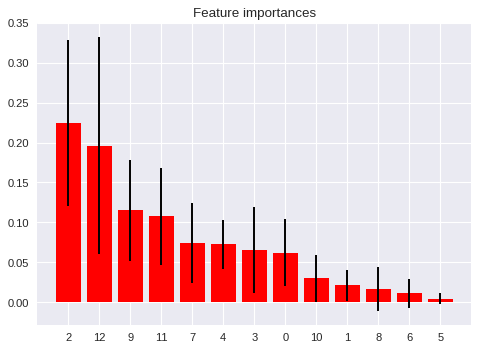

In [12]:
importances = clf3.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], colnames[indices[f]], importances[indices[f]]))

plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
# Printing best top 5 features
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], colnames[indices[f]] ,importances[indices[f]]))

1. feature 2 - cp (0.224430)
2. feature 12 - thal (0.196120)
3. feature 9 - oldpeak (0.115312)
4. feature 11 - ca (0.107373)
5. feature 7 - thalach (0.074184)


In [0]:
best_features =  [colnames[indices[i]] for i in range(2)]

In [15]:
best_features

['cp', 'thal']

In [0]:
new_data = dataFrame[best_features]

In [0]:
new_data_norm = normalize(new_data.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
Accuracy of the Random Forest is: 73.58490566037736
Precision and Recall for the Random Forest

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75        26
         1.0       0.78      0.67      0.72        27

   micro avg       0.74      0.74      0.74        53
   macro avg       0.74      0.74      0.73        53
weighted avg       0.74      0.74      0.73        53

Confusion Matrix



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


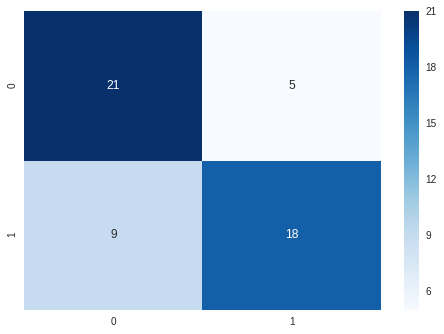

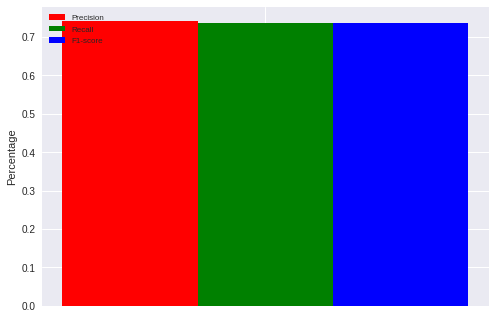

In [18]:
clf_new = RandomForestClassifier(random_state=1)
print(clf_new)
clf_new = clf_new.fit(new_data_norm[:250],Y[:250])

Y_new_predicted_RandomForest = clf_new.predict(new_data_norm[250:])

print ("Accuracy of the Random Forest is: "+ str(accuracy(Y[250:],Y_new_predicted_RandomForest)))
print ("Precision and Recall for the Random Forest\n")
print (metrics.classification_report(Y[250:],Y_new_predicted_RandomForest))
print ("Confusion Matrix\n")
plot_confusion_matrix(Y[250:],Y_new_predicted_RandomForest)
plot_stats_bargraph(Y[250:], Y_new_predicted_RandomForest)


**SVM**

     pcost       dcost       gap    pres   dres
 0: -1.7854e+02 -7.1292e+03  1e+04  3e-01  2e-14
 1: -2.7799e+02 -1.3169e+03  1e+03  7e-03  2e-14
 2: -4.3512e+02 -8.5431e+02  4e+02  2e-03  1e-14
 3: -5.1442e+02 -6.8235e+02  2e+02  7e-04  1e-14
 4: -5.5344e+02 -6.2936e+02  8e+01  3e-04  1e-14
 5: -5.6832e+02 -6.0934e+02  4e+01  1e-04  1e-14
 6: -5.8073e+02 -5.9085e+02  1e+01  1e-05  2e-14
 7: -5.8417e+02 -5.8629e+02  2e+00  3e-15  2e-14
 8: -5.8507e+02 -5.8518e+02  1e-01  1e-14  2e-14
 9: -5.8512e+02 -5.8512e+02  3e-03  3e-14  2e-14
10: -5.8512e+02 -5.8512e+02  8e-05  3e-14  2e-14
Optimal solution found.
Accuracy of the SVM is: 79.24528301886792
Precision and Recall for the SVM 

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79        26
         1.0       0.81      0.78      0.79        27

   micro avg       0.79      0.79      0.79        53
   macro avg       0.79      0.79      0.79        53
weighted avg       0.79      0.79      0

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


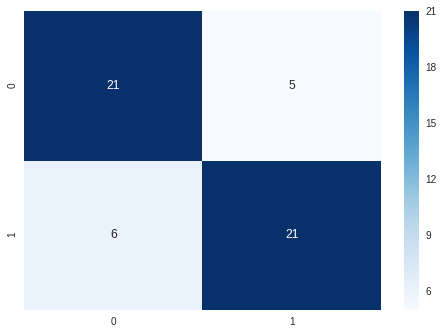

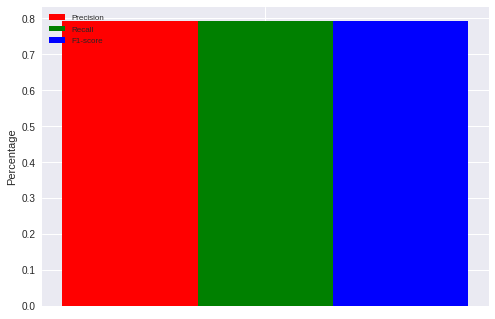

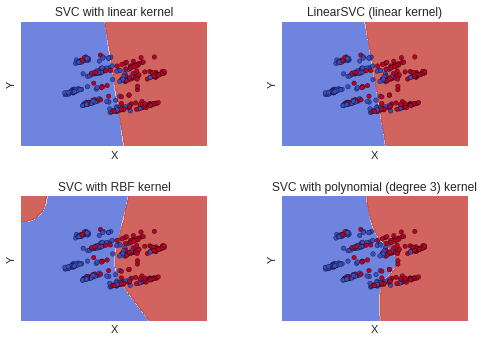

In [19]:
def prediction(X,X_SV,Y_SV,W0,alpha_SV):
    Y_prediction = []
    
    for x in X:
        res = 0
        for i in range(len(alpha_SV)):
            res += alpha_SV[i]*Y_SV[i]*rbsKernal(X_SV[i],x)
        
        if res + W0 > 0:
            Y_prediction.append(1)
        else:
            Y_prediction.append(-1)
            
    return np.array(Y_prediction)   

def rbsKernal(X,Y,sigma = 3.0):
    return np.exp((-(np.linalg.norm(X-Y)**2))/(2*sigma**2))


def gram_matrix(X):
    m = len(X)
    gramMatrix = np.zeros(shape=(m,m))
    for i in range(m):
        x = X[i]
        for j in range(m):        
            y = X[j]
            gramMatrix[i][j] += rbsKernal(x,y)
    
    return gramMatrix


def training(X,Y,e,c):
    
    P = (gram_matrix(X)) * (np.dot(Y,np.transpose(Y)))
    q = np.zeros(shape=(X.shape[0],1))
    q.fill(-1)
    
    G1 = np.zeros(shape=(X.shape[0],X.shape[0]))
    np.fill_diagonal(G1,-1)
    G2 = np.zeros(shape=(X.shape[0],X.shape[0]))
    np.fill_diagonal(G2,1)
    G = np.concatenate((G1,G2))
    
    H1 = np.zeros(shape = (X.shape[0],1))
    H2 = np.full((X.shape[0],1),c)
    H = np.concatenate((H1,H2))
    
    A = np.transpose(Y)
    
    b = 0
    
    soln = solvers.qp(matrix(P,tc = 'd'),
                  matrix(q),
                  matrix(G,tc = 'd'),
                  matrix(H,tc = 'd'),
                  matrix(A,tc = 'd'),
                  matrix(b,tc='d'))
    
    alpha = (np.ravel(soln['x']))
    
    alpha_SV = alpha[alpha>e]
    X_SV = X[alpha>e]
    Y_SV = Y[alpha>e]
    index = np.where(alpha>e)
    
    W0 = 0
    for i in range(len(alpha_SV)):
        res = 0
        for j in range(len(alpha_SV)):
            res += alpha_SV[j]*Y_SV[j]*rbsKernal(X[j],X[i])
        W0 += Y[i] - res
    
    W0 = 1. * W0/len(alpha_SV) 
    
    return (alpha_SV,X_SV,Y_SV,W0,index[0])


def SVM(X,Y,e,c):
  
    Y = np.reshape(np.array(Y),(len(Y),1))
    Y[Y == 0] = -1
    
    alpha_SV,X_SV,Y_SV,W0,index = training(X[:250],Y[:250],e,c)
    
    Y_hat_svm = prediction(X[250:],X_SV,Y_SV,W0,alpha_SV)
    
    Y_hat_svm[Y_hat_svm == -1] = 0
    
    return Y_hat_svm



Y_predicted_svm = SVM(X_norm,Y,0.0001,7)


print ("Accuracy of the SVM is: "+ str(accuracy(Y[250:],Y_predicted_svm)))
print ("Precision and Recall for the SVM \n")
print (metrics.classification_report(Y[250:],Y_predicted_svm))
print ("Confusion Matrix\n")
plot_confusion_matrix(Y[250:],Y_predicted_svm)
plot_stats_bargraph(Y[250:], Y_predicted_svm)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_norm)

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(principalComponents,Y[:]) for clf in models)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = principalComponents[:,0], principalComponents[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

**SVM USING SKLEARN**

Accuracy of the SVM using sklearn-linear is: 77.35849056603774
Precision and Recall for the SVM 

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79        26
         1.0       0.86      0.67      0.75        27

   micro avg       0.77      0.77      0.77        53
   macro avg       0.79      0.78      0.77        53
weighted avg       0.79      0.77      0.77        53

Confusion Matrix



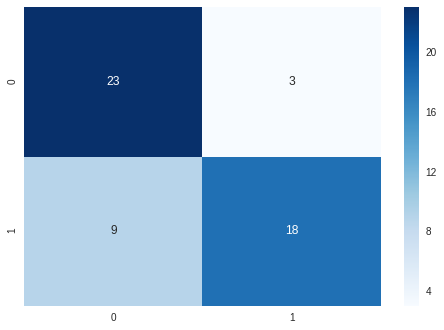

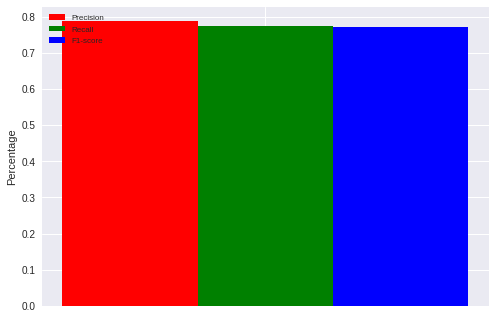

In [20]:
clf4 = SVC(C=1, kernel='linear',gamma=0.1)
clf4.fit(X_norm[:250], Y[:250]) 
Y_Predicted_SkSvm = clf4.predict(X_norm[250:])

print ("Accuracy of the SVM using sklearn-linear is: "+ str(accuracy(Y[250:],Y_Predicted_SkSvm)))
print ("Precision and Recall for the SVM \n")
print (metrics.classification_report(Y[250:],Y_Predicted_SkSvm))
print ("Confusion Matrix\n")
plot_confusion_matrix(Y[250:],Y_Predicted_SkSvm)
plot_stats_bargraph(Y[250:], Y_Predicted_SkSvm)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of the SVM using sklearn-poly is: 67.9245283018868
Precision and Recall for the SVM 

              precision    recall  f1-score   support

         0.0       0.62      0.92      0.74        26
         1.0       0.86      0.44      0.59        27

   micro avg       0.68      0.68      0.68        53
   macro avg       0.74      0.68      0.66        53
weighted avg       0.74      0.68      0.66        53

Confusion Matrix



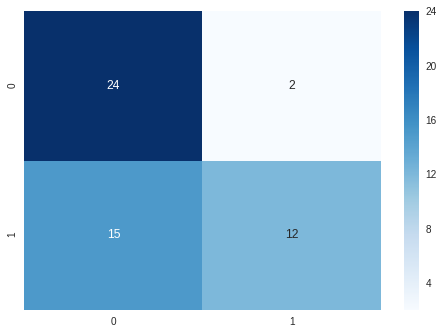

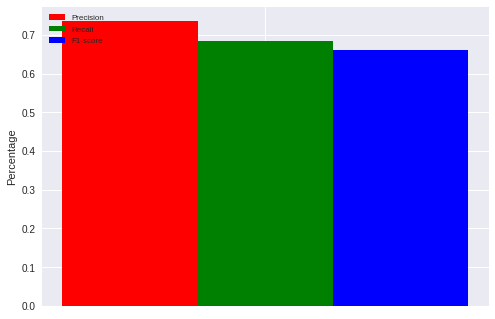

In [21]:
clf4 = SVC(C=1, kernel='poly', degree=3)
clf4.fit(principalComponents[:250], Y[:250]) 
Y_Predicted_SkSvm = clf4.predict(principalComponents[250:])

print ("Accuracy of the SVM using sklearn-poly is: "+ str(accuracy(Y[250:],Y_Predicted_SkSvm)))
print ("Precision and Recall for the SVM \n")
print (metrics.classification_report(Y[250:],Y_Predicted_SkSvm))
print ("Confusion Matrix\n")
plot_confusion_matrix(Y[250:],Y_Predicted_SkSvm)
plot_stats_bargraph(Y[250:], Y_Predicted_SkSvm)

**NEURAL NETWORK USING SKLEARN**

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
0.872
Accuracy of the Neural Network is: 77.35849056603774
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79        26
         1.0       0.86      0.67      0.75        27

   micro avg       0.77      0.77      0.77        53
   macro avg       0.79      0.78      0.77        53
weighted avg       0.79      0.77      0.77        53

None


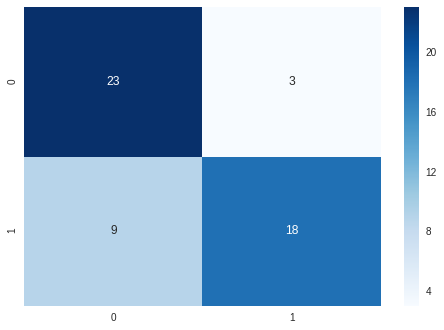

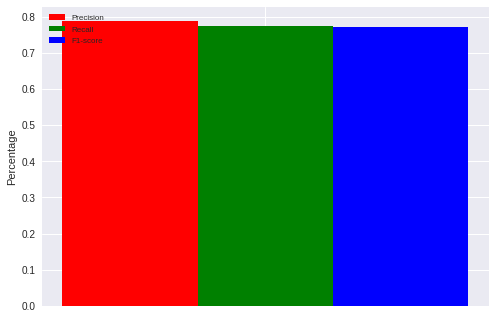

In [22]:
clfn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1), random_state=1)
clfn.fit(X_norm[:250],Y[:250])
print(clfn)
predictions = clfn.predict(X_norm[250:])
print(clfn.score(X_norm[:250], Y[:250]))
print ("Accuracy of the Neural Network is: "+ str(accuracy(Y[250:],predictions)))
print (metrics.classification_report(Y[250:],predictions))
print(plot_confusion_matrix(Y[250:],predictions))
plot_stats_bargraph(Y[250:], predictions)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
Accuracy of the kNN is: 77.35849056603774
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79        26
         1.0       0.86      0.67      0.75        27

   micro avg       0.77      0.77      0.77        53
   macro avg       0.79      0.78      0.77        53
weighted avg       0.79      0.77      0.77        53

None


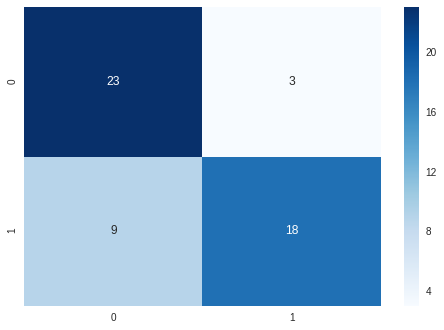

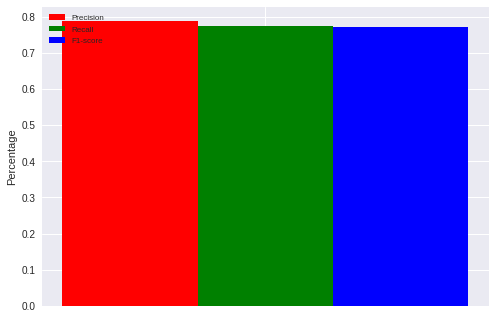

In [23]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
neigh.fit(X_norm[:250], Y[:250])
print(neigh)
predictions_KNeighbour = neigh.predict(X_norm[250:])
print ("Accuracy of the kNN is: "+ str(accuracy(Y[250:],predictions_KNeighbour)))
print (metrics.classification_report(Y[250:],predictions_KNeighbour))
print(plot_confusion_matrix(Y[250:],predictions_KNeighbour))
plot_stats_bargraph(Y[250:], predictions_KNeighbour)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
Accuracy of the kNN is: 73.58490566037736
              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77        26
         1.0       0.84      0.59      0.70        27

   micro avg       0.74      0.74      0.74        53
   macro avg       0.76      0.74      0.73        53
weighted avg       0.76      0.74      0.73        53

None


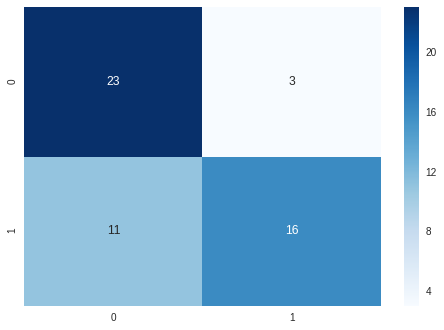

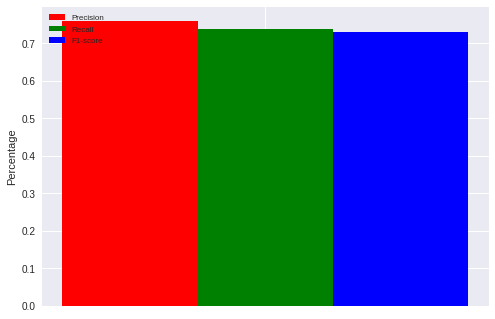

In [24]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X_norm[:250], Y[:250])
print(neigh)
predictions_KNeighbour = neigh.predict(X_norm[250:])
print ("Accuracy of the kNN is: "+ str(accuracy(Y[250:],predictions_KNeighbour)))
print (metrics.classification_report(Y[250:],predictions_KNeighbour))
print(plot_confusion_matrix(Y[250:],predictions_KNeighbour))
plot_stats_bargraph(Y[250:], predictions_KNeighbour)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
Accuracy of the kNN is: 69.81132075471697
              precision    recall  f1-score   support

         0.0       0.66      0.81      0.72        26
         1.0       0.76      0.59      0.67        27

   micro avg       0.70      0.70      0.70        53
   macro avg       0.71      0.70      0.70        53
weighted avg       0.71      0.70      0.69        53

None


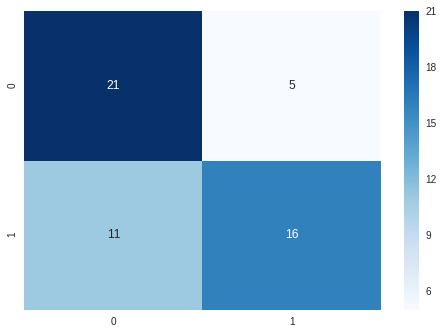

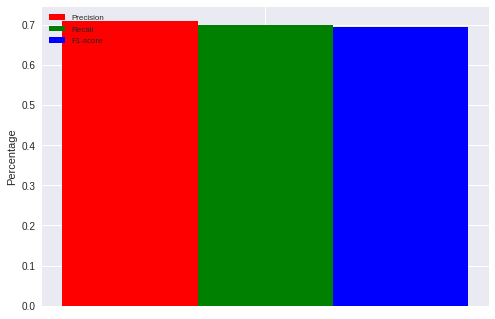

In [25]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='cosine')
neigh.fit(X_norm[:250], Y[:250])
print(neigh)
predictions_KNeighbour = neigh.predict(X_norm[250:])
print ("Accuracy of the kNN is: "+ str(accuracy(Y[250:],predictions_KNeighbour)))
print (metrics.classification_report(Y[250:],predictions_KNeighbour))
print(plot_confusion_matrix(Y[250:],predictions_KNeighbour))
plot_stats_bargraph(Y[250:], predictions_KNeighbour)